**Adease - Time Series Forecasting - Problem Statement:**

You are working in the Data Science team of Ad ease trying to
*   understand the per **page view report** for different wikipedia pages for **550 days**, and
*   forecasting the number of views so that

you can **predict and optimize the ad placement** for your clients.


You are provided with the data of **145k wikipedia pages and daily view count** for each of them. **Your clients belong to different regions** and need data on how their ads will perform on pages in different languages.

**What does “good” look like?**

Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset

Checking null values and understanding their reason.

Understanding the page name format and splitting it to get different information.

Separating different values from it like title, language, access type, and access origin.

Visualizing the data and getting inferences from them

Converting the data to a format that can be fed to the Arima model (Pivoting etc)

Checking if the data is stationary

Dickey-Fuller test

Trying different methods for stationarity.

Decomposition of series.

Differencing the series.

Plotting the ACF and PACF plots

Give insights about the characteristics of the time series.

Modeling

Creating and training the Arima model

Getting the exogenous variable and using it to train a sarimax model

Use facebook prophet for forecasting


Finding a way(grid search / etc) to find the best params for at least 1 modeling approach.

Defining functions for all of the tasks.

Comparing results for all languages and creating inferences and recommendations from them

The MAPE for previous batches has been in the range of 4-8%




**Evaluation Criteria (100 points)**

Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset (10 points)

Exploratory Data Analysis (20 points)

Separating the data

Analyzing and visualizing the data

Getting inferences

Checking stationarity (20 points)

Formatting the data for the model

Dickey fuller test

Decomposition

Differencing

Creating model training and forecasting with ARIMA, SARIMAX (20 points)

ACF and PACF plot.

Training the model.

Forecasting for different languages/regions.

Plotting the final results

Forecasting with (20 points)

Facebook prophet
Creating a pipeline for working with multiple series (10 points)

**Questionnaire:**

Defining the problem statements and where can this and modifications of this be used?

Write 3 inferences you made from the data visualizations

What does the decomposition of series do?

What level of differencing gave you a stationary series?

Difference between arima, sarima & sarimax.

Compare the number of views in different languages

What other methods other than grid search would be suitable to get the model for all languages?

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/train_1.csv')

In [2]:
df.shape

(145063, 551)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [4]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
df['Page']

,Page
0,2NE1_zh.wikipedia.org_all-access_spider
1,2PM_zh.wikipedia.org_all-access_spider
2,3C_zh.wikipedia.org_all-access_spider
3,4minute_zh.wikipedia.org_all-access_spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...


In [6]:
# Extract name, language, access_type & access_origin from page values
reg_exp = r'^(.+?)_([a-z\-]+)\.wikipedia\.org_([a-z\-]+)_([a-z\-]+)$'
df[['name', 'language', 'access_type', 'access_origin']] = df['Page'].str.extract(reg_exp)


In [7]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,name,language,access_type,access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You,zh,all-access,spider


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 555 entries, Page to access_origin
dtypes: float64(550), object(5)
memory usage: 614.2+ MB


In [9]:
cat_cols = []
num_cols = []

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')
    print(f'{col} : {df[col].nunique()}')
    cat_cols.append(col)
  else:
    num_cols.append(col)

Page : 145063
name : 42212
language : 7
access_type : 3
access_origin : 2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 555 entries, Page to access_origin
dtypes: category(5), float64(550)
memory usage: 616.7 MB


In [11]:
cat_cols

['Page', 'name', 'language', 'access_type', 'access_origin']

In [12]:
for col in cat_cols:
  print(f'{col} : {df[col].unique()}')

Page : ['2NE1_zh.wikipedia.org_all-access_spider', '2PM_zh.wikipedia.org_all-access_spider', '3C_zh.wikipedia.org_all-access_spider', '4minute_zh.wikipedia.org_all-access_spider', '52_Hz_I_Love_You_zh.wikipedia.org_all-access_..., ..., 'Underworld_(serie_de_películas)_es.wikipedia...., 'Resident_Evil:_Capítulo_Final_es.wikipedia.or..., 'Enamorándome_de_Ramón_es.wikipedia.org_all-ac..., 'Hasta_el_último_hombre_es.wikipedia.org_all-a..., 'Francisco_el_matemático_(serie_de_televisión_...]
Length: 145063
Categories (145063, object): ['!vote_en.wikipedia.org_all-access_all-agents', '!vote_en.wikipedia.org_all-access_spider',
                              '!vote_en.wikipedia.org_desktop_all-agents',
                              '"Awaken,_My_Love!"_en.wikipedia.org_all-acces..., ...,
                              '［Alexandros］_ja.wikipedia.org_all-access_all-...,
                              '［Alexandros］_ja.wikipedia.org_all-access_spider',
                              '［Alexandros］_ja.wi

145K different pages breakdown:
*   550 days of page view count
*   42K unique pages
*   7 different languages (de, en, es, fr, ja, ru, zh)
*   3 access_types (all-access, desktop, mobile-web)
*   2 access_origins (all-agents, spider)

In [13]:
# Checking stationarity

# Formatting data for the model using melt
df_melt = pd.melt(df,
                  id_vars=['name', 'language', 'access_type', 'access_origin'],
                  value_vars=num_cols,
                  var_name='date',
                  value_name='views')

In [14]:
df_melt.shape

(79784650, 6)

In [15]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79784650 entries, 0 to 79784649
Data columns (total 6 columns):
 #   Column         Dtype   
---  ------         -----   
 0   name           category
 1   language       category
 2   access_type    category
 3   access_origin  category
 4   date           object  
 5   views          float64 
dtypes: category(4), float64(1), object(1)
memory usage: 1.7+ GB


In [16]:
df_melt.head()

,name,language,access_type,access_origin,date,views
0,2NE1,zh,all-access,spider,2015-07-01,18.0
1,2PM,zh,all-access,spider,2015-07-01,11.0
2,3C,zh,all-access,spider,2015-07-01,1.0
3,4minute,zh,all-access,spider,2015-07-01,35.0
4,52_Hz_I_Love_You,zh,all-access,spider,2015-07-01,NaN


In [17]:
# Pick one segment to analyze - use 'en' language as we have exogenous data only for that language
for col in df_melt.columns:
  print(f'Column = {col} - Unique values & their counts {df_melt[col].value_counts()}\n')

Column = name - Unique values & their counts name
YouTube                      15400
Facebook                     15400
Special:Search               14850
Google                       14850
IPhone                       13200
                             ...  
Especial:PáginasNuevas         550
Especial:Registro/block        550
Especial:RegistroAbusos        550
Espectro_electromagnético      550
Losee                          550
Name: count, Length: 42212, dtype: int64

Column = language - Unique values & their counts language
en    13259400
ja    11237050
de    10200850
fr     9791100
zh     9475950
ru     8262100
es     7737950
Name: count, dtype: int64

Column = access_type - Unique values & their counts access_type
all-access    36142150
mobile-web    17007650
desktop       16814600
Name: count, dtype: int64

Column = access_origin - Unique values & their counts access_origin
all-agents    53126700
spider        16837700
Name: count, dtype: int64

Column = date - Unique values & 

In [18]:
df_en = df_melt[df_melt['language'] == 'en']

In [19]:
df_en.shape

(13259400, 6)

In [20]:
df_en.head()

,name,language,access_type,access_origin,date,views
8357,!vote,en,desktop,all-agents,2015-07-01,3.0
8358,"""Awaken,_My_Love!""",en,desktop,all-agents,2015-07-01,NaN
8359,"""European_Society_for_Clinical_Investigation""",en,desktop,all-agents,2015-07-01,NaN
8360,"""Weird_Al""_Yankovic",en,desktop,all-agents,2015-07-01,2403.0
8361,100_metres,en,desktop,all-agents,2015-07-01,982.0


In [21]:
for cols in df_en.columns:
  print(f'Column = {cols} - Unique values & their counts - {df_en[cols].value_counts()}\n')

Column = name - Unique values & their counts - name
Sarah_Palin                 2200
Sarah_Paulson               2200
Sarah_Silverman             2200
Sarbjit_(film)              2200
Sardaar_Gabbar_Singh        2200
                            ... 
Necrofilia                     0
Necati_Arabaci                 0
Near_Field_Communication       0
Ne_me_quitte_pas               0
Nekrose                        0
Name: count, Length: 42212, dtype: int64

Column = language - Unique values & their counts - language
en    13259400
de           0
es           0
fr           0
ja           0
ru           0
zh           0
Name: count, dtype: int64

Column = access_type - Unique values & their counts - access_type
all-access    7892500
desktop       2736250
mobile-web    2630650
Name: count, dtype: int64

Column = access_origin - Unique values & their counts - access_origin
all-agents    10547350
spider         2712050
Name: count, dtype: int64

Column = date - Unique values & their counts - da

In [22]:
df_en.groupby(['name'])['views'].sum().sort_values(ascending=False)

<ipython-input-22-4117963205>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_en.groupby(['name'])['views'].sum().sort_values(ascending=False)


,views
name,
Main_Page,2.412368e+10
Special:Search,2.732400e+09
Special:Book,2.853490e+08
404.php,1.880922e+08
Donald_Trump,1.817671e+08
...,...
Naufrage_du_Costa_Concordia,0.000000e+00
Natus_Vincere,0.000000e+00
Naturaleza,0.000000e+00


In [23]:
df_en.sort_values(by=['name', 'language', 'access_type', 'access_origin', 'date'], inplace=True)

<ipython-input-23-1719284609>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en.sort_values(by=['name', 'language', 'access_type', 'access_origin', 'date'], inplace=True)


In [24]:
df_en.head()

,name,language,access_type,access_origin,date,views
37206,!vote,en,all-access,all-agents,2015-07-01,3.0
182269,!vote,en,all-access,all-agents,2015-07-02,4.0
327332,!vote,en,all-access,all-agents,2015-07-03,7.0
472395,!vote,en,all-access,all-agents,2015-07-04,4.0
617458,!vote,en,all-access,all-agents,2015-07-05,4.0


In [25]:
df_en.reset_index(drop=True, inplace=True)

In [26]:
df_en.head()

,name,language,access_type,access_origin,date,views
0,!vote,en,all-access,all-agents,2015-07-01,3.0
1,!vote,en,all-access,all-agents,2015-07-02,4.0
2,!vote,en,all-access,all-agents,2015-07-03,7.0
3,!vote,en,all-access,all-agents,2015-07-04,4.0
4,!vote,en,all-access,all-agents,2015-07-05,4.0


In [27]:
df_en.groupby(['name','language','access_type', 'access_origin'])['views'].sum().sort_values(ascending=False)

<ipython-input-27-1809187291>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_en.groupby(['name','language','access_type', 'access_origin'])['views'].sum().sort_values(ascending=False)


name            language  access_type  access_origin
Main_Page       en        all-access   all-agents       1.206618e+10
                          desktop      all-agents       8.774497e+09
                          mobile-web   all-agents       3.153985e+09
Special:Search  en        all-access   all-agents       1.304079e+09
                          desktop      all-agents       1.011848e+09
                                                            ...     
Les_Minto       ru        all-access   spider           0.000000e+00
                                       all-agents       0.000000e+00
                ja        mobile-web   spider           0.000000e+00
                                       all-agents       0.000000e+00
                zh        mobile-web   spider           0.000000e+00
Name: views, Length: 1772904, dtype: float64

In [28]:
segment_df = df_en[ (df_en['name'] == 'Main_Page') &
                    (df_en['language'] == 'en') &
                    (df_en['access_type'] == 'all-access') &
                    (df_en['access_origin'] == 'all-agents')
                  ]

In [29]:
segment_df.shape

(550, 6)

In [30]:
segment_df.head()

,name,language,access_type,access_origin,date,views
7480550,Main_Page,en,all-access,all-agents,2015-07-01,20381245.0
7480551,Main_Page,en,all-access,all-agents,2015-07-02,20752194.0
7480552,Main_Page,en,all-access,all-agents,2015-07-03,19573967.0
7480553,Main_Page,en,all-access,all-agents,2015-07-04,20439645.0
7480554,Main_Page,en,all-access,all-agents,2015-07-05,20772109.0


In [31]:
segment_df.reset_index(drop=True, inplace=True)

In [32]:
segment_df.head()

,name,language,access_type,access_origin,date,views
0,Main_Page,en,all-access,all-agents,2015-07-01,20381245.0
1,Main_Page,en,all-access,all-agents,2015-07-02,20752194.0
2,Main_Page,en,all-access,all-agents,2015-07-03,19573967.0
3,Main_Page,en,all-access,all-agents,2015-07-04,20439645.0
4,Main_Page,en,all-access,all-agents,2015-07-05,20772109.0


In [33]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           550 non-null    category
 1   language       550 non-null    category
 2   access_type    550 non-null    category
 3   access_origin  550 non-null    category
 4   date           550 non-null    object  
 5   views          550 non-null    float64 
dtypes: category(4), float64(1), object(1)
memory usage: 1.3+ MB


In [34]:
# Change 'date' column datatype to 'datetime'
segment_df['date'] = pd.to_datetime(segment_df['date'])

<ipython-input-34-1872209960>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['date'] = pd.to_datetime(segment_df['date'])


In [35]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           550 non-null    category      
 1   language       550 non-null    category      
 2   access_type    550 non-null    category      
 3   access_origin  550 non-null    category      
 4   date           550 non-null    datetime64[ns]
 5   views          550 non-null    float64       
dtypes: category(4), datetime64[ns](1), float64(1)
memory usage: 1.3 MB


In [36]:
# Check for missing values
segment_df.isnull().sum()

,0
name,0
language,0
access_type,0
access_origin,0
date,0
views,0


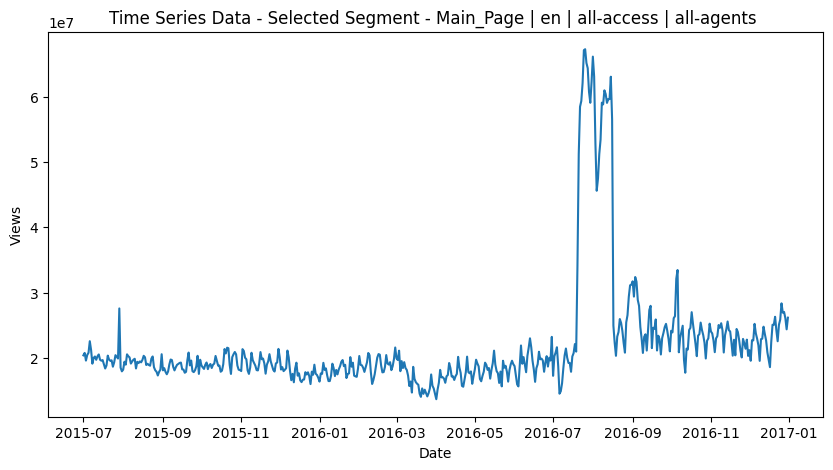

In [37]:
# Visualize the timeseries data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.lineplot(data=segment_df, x='date', y='views')

plt.title('Time Series Data - Selected Segment - Main_Page | en | all-access | all-agents ')
plt.xlabel('Date')
plt.ylabel('Views')
plt.show()

The time series data of the segment:
*  has trend, increasing
*  has seasonality, appears to be weekly
*  has a huge spike in page views count between July to Sep of 2016

In [38]:
# Check stationarity - using Dickey fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(segment_df['views'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.990145
p-value: 0.035825


**Dickey Fuller Test for stationarity:**
*   Null hypothesis: Series is non-stationary
*   p-value < 0.05, reject null hypothesis
*   Time series is stationary

**What is a stationary time series?**
Stationary data has constant mean, constant variance, constant auto-covariance. The statistical properties of the series (mean, variance, autocorrelation) do not change with time.

**Why check for stationarity?**
*  Many time series forecasting models (ARMA, ACF, PACF etc) assume stationarity of the time series
*  Non-stationary data causes unreliable forecasts & inflated errors

<Figure size 1000x500 with 0 Axes>

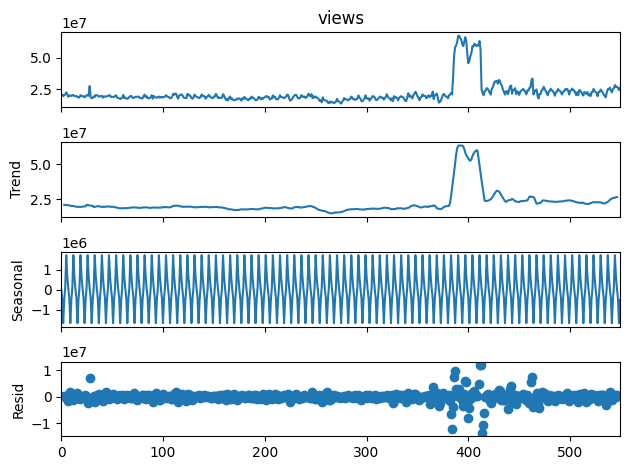

In [39]:
# Decomposition - decompose the time series into level, trend & seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

# As data is daily page views, assuming a seasonality period of 7 days
decomposed_data = seasonal_decompose(segment_df['views'], model='additive', period=7)

# Plot the decomposed data
plt.figure(figsize=(10,5))
decomposed_data.plot()
plt.show()

In [40]:
# Differencing - to remove trend & seasonality and convert non-stationary time series to stationary data

# Check if time series is date-indexed

# Set 'date' as the index
segment_df = segment_df.set_index('date').sort_index()

# Extract the time series
series = segment_df['views']

# Confirm it's date-indexed
if isinstance(series.index, pd.DatetimeIndex):
    print("✅ 'series' is now a date-indexed pandas Series and ready for time series modeling.")
else:
    print("❌ 'series' is not date-indexed.")


✅ 'series' is now a date-indexed pandas Series and ready for time series modeling.


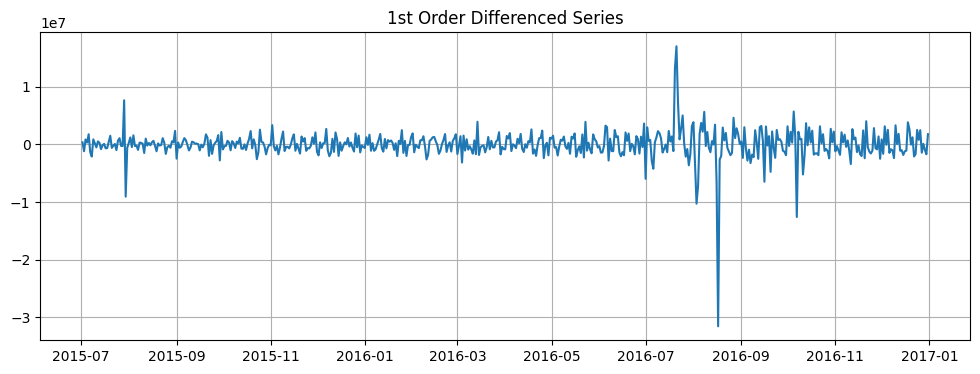

In [41]:
# Remove Trend - 1st order differencing
diff_1 = series.diff().dropna()

# Plot it to observe changes
plt.figure(figsize=(12, 4))
plt.plot(diff_1)
plt.title("1st Order Differenced Series")
plt.grid(True)
plt.show()


*   Long term trend removed
*   Centered around 0
*   Has a spike between July & Sep 2016 - check if anamoly or is it event based

In [42]:
# Check stationarity after 1st order differencing
from statsmodels.tsa.stattools import adfuller

result = adfuller(diff_1)
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")


ADF Statistic: -6.6386
p-value: 0.0000


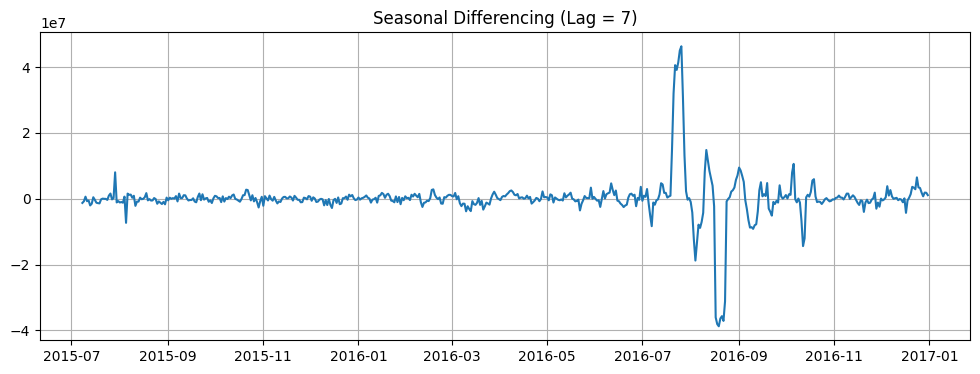

In [43]:
# Try seasonal differencing - as the time series data has weekly cycles
seasonal_diff = series.diff(7).dropna()

plt.figure(figsize=(12, 4))
plt.plot(seasonal_diff)
plt.title("Seasonal Differencing (Lag = 7)")
plt.grid(True)
plt.show()


In [44]:
# Check stationarity after seasonal differencing
from statsmodels.tsa.stattools import adfuller

result = adfuller(seasonal_diff)
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")


ADF Statistic: -5.3260
p-value: 0.0000


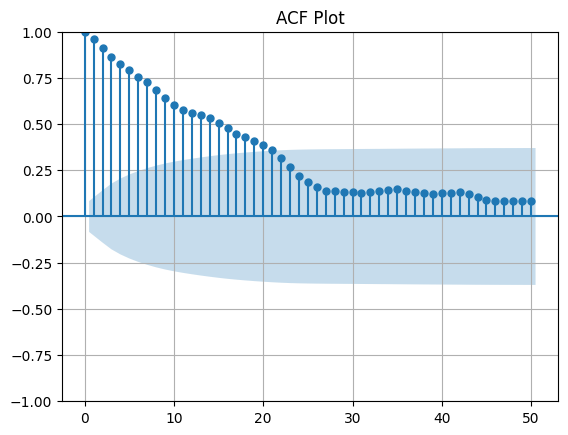

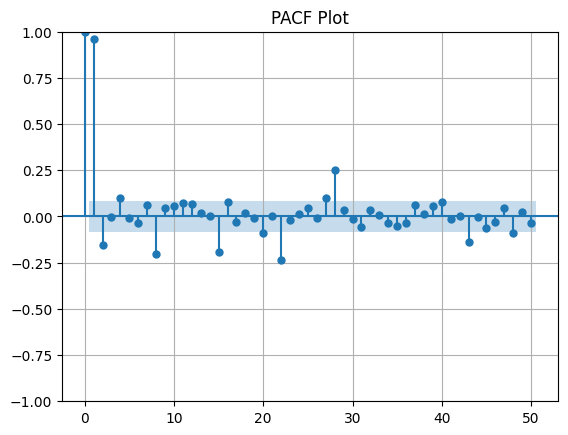

In [45]:
# Plot ACF & PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot — for choosing q (MA)
plot_acf(series, lags=50)
plt.title("ACF Plot")
plt.grid(True)
plt.show()

# PACF plot — for choosing p (AR)
plot_pacf(series, lags=50, method='ywm')  # 'ywm' is stable for noisy data
plt.title("PACF Plot")
plt.grid(True)
plt.show()



**ACF plot - used to estimate Moving Average (MA) order - q value - uses past forecast errors to predict future value:**
*  Very high correlation at lag 1, slowly decreasing over many lags (25+)
*  Use q = 0 (current value does not depend on past errors (residuals))

**PACF plot - used to estimate Auto Regression (AR) order - p value - uses past values to predict future values:**
*  Strong spike at lag 1 & 2, after lag 2 all other lags are within confidence band (blue shaded region)
*  Use p = 2 (last 2 values for prediction, after that lag values don't impact significantly the prediction)

**Final derived values for ARIMA model:
*  p = 2 - from PACF cut-off after lag 2
*  d = 0 - from ADF test (already stationary)
*  q = 0 or 1 - from slow tailing ACF



Test size = 110



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


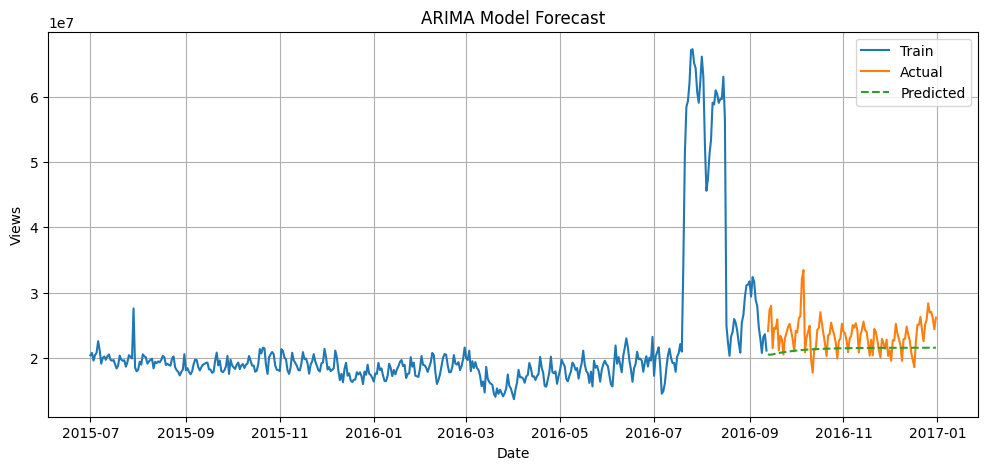

In [46]:
# Training the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

test_size = int(0.2 * len(series))
print(f'Test size = {test_size}\n')

# Split into train, test sets
train = series[:-test_size]
test = series[-test_size:]

# Fit ARIMA with your p, d, q
model = ARIMA(train, order=(2, 0, 0))
fitted_model = model.fit()

# Forecast same length as test set
forecast = fitted_model.forecast(steps=len(test))

# Plot prediction vs actual
plt.figure(figsize=(12, 5))

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Predicted', linestyle='--')

plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.grid(True)
plt.show()



In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")


MAE: 2618371.34, RMSE: 3288518.88, MAPE: 10.59%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


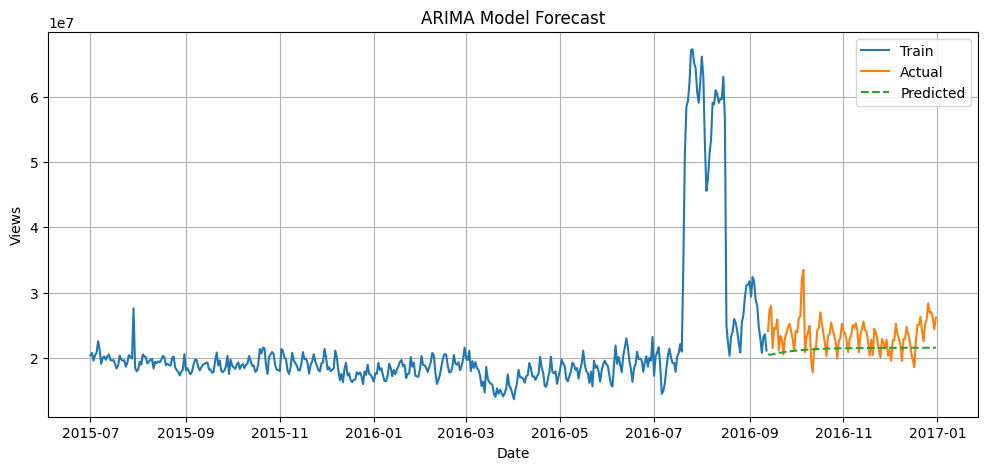

In [48]:
# Now try fitting ARIMA with your p, d, q = 1
model = ARIMA(train, order=(2, 0, 1))
fitted_model = model.fit()

# Forecast same length as test set
forecast = fitted_model.forecast(steps=len(test))

# Plot prediction vs actual
plt.figure(figsize=(12, 5))

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Predicted', linestyle='--')

plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.grid(True)
plt.show()



In [49]:
# Metrics with p, d, q = (2,0,1)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

MAE: 2617816.36, RMSE: 3287778.30, MAPE: 10.59%



📊 ARIMA(2,0,1)
MAE:  2617816.36
RMSE: 3287778.30
MAPE: 10.59%

📊 Simple Exponential Smoothing
MAE:  2729794.44
RMSE: 3393226.56
MAPE: 11.01%

📊 Double Exponential Smoothing
MAE:  4098204.22
RMSE: 4766338.91
MAPE: 16.69%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python


📊 Triple Exponential Smoothing
MAE:  7726516.32
RMSE: 8661295.98
MAPE: 32.29%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


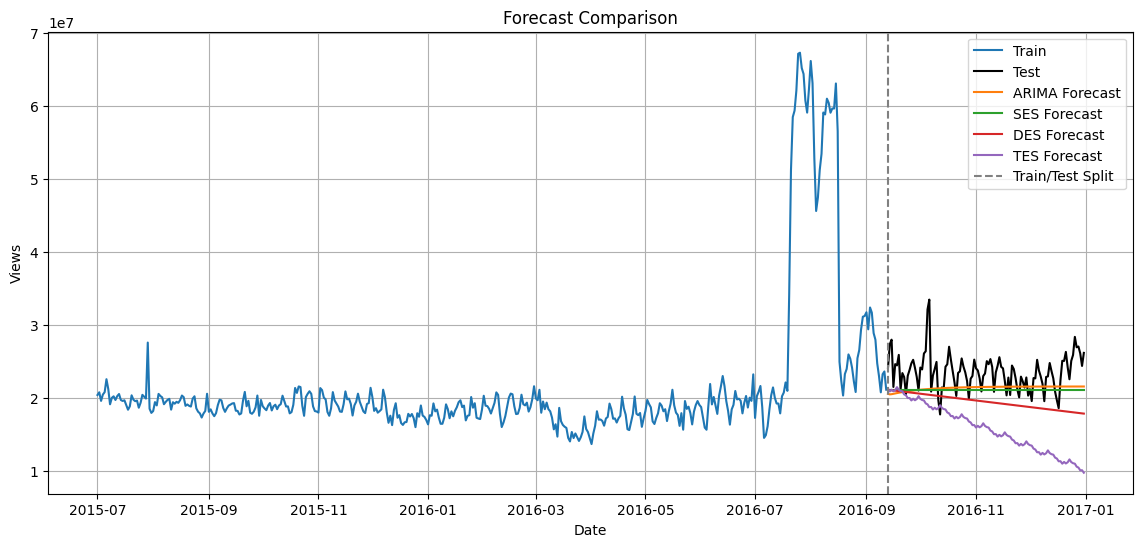

In [50]:
# Compare ARIMA forecasting with SES, DES & TES forecasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# === Metrics Function ===
def print_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    print(f"\n📊 {model_name}")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

# === 1. ARIMA ===
arima_model = ARIMA(train, order=(2, 0, 1)).fit()
arima_forecast = arima_model.forecast(steps=len(test))
print_metrics(test, arima_forecast, "ARIMA(2,0,1)")

# === 2. SES ===
ses_model = SimpleExpSmoothing(train).fit()
ses_forecast = ses_model.forecast(steps=len(test))
print_metrics(test, ses_forecast, "Simple Exponential Smoothing")

# === 3. DES ===
des_model = ExponentialSmoothing(train, trend='add').fit()
des_forecast = des_model.forecast(steps=len(test))
print_metrics(test, des_forecast, "Double Exponential Smoothing")

# === 4. TES ===
tes_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
tes_forecast = tes_model.forecast(steps=len(test))
print_metrics(test, tes_forecast, "Triple Exponential Smoothing")

# === Plot All Forecasts ===
plt.figure(figsize=(14, 6))

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='black')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test.index, ses_forecast, label='SES Forecast')
plt.plot(test.index, des_forecast, label='DES Forecast')
plt.plot(test.index, tes_forecast, label='TES Forecast')
plt.axvline(test.index[0], color='gray', linestyle='--', label='Train/Test Split')

plt.title("Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.show()


In [51]:
# Forecasting with Facebook Prophet
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/d4c5vemo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/64vl2tmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94983', 'data', 'file=/tmp/tmpglw3ycwk/d4c5vemo.json', 'init=/tmp/tmpglw3ycwk/64vl2tmp.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_modelrudrr03u/prophet_model-20250611003523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:35:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:35:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📊 Prophet Evaluation
MAE  = 23554352.92
RMSE = 24178609.90
MAPE = 102.24%


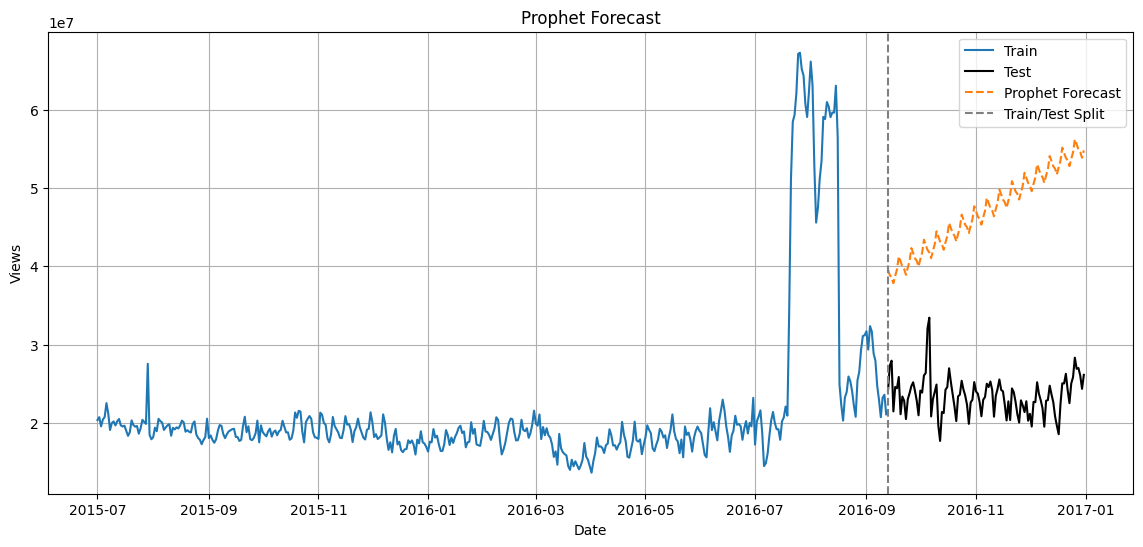

In [52]:
from prophet import Prophet

# Convert train and test into DataFrames with 'ds' and 'y'
train_df = train.reset_index()
train_df.columns = ['ds', 'y']

test_df = test.reset_index()
test_df.columns = ['ds', 'y']

# Initialize and train Prophet - without exogenous variable
model = Prophet()
model.fit(train_df)

# Create future dataframe
future = model.make_future_dataframe(periods=len(test_df))

# Forecast
forecast = model.predict(future)

# Get only the forecasted test period
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test_df):]

# Evaluate
y_true = test_df['y'].values
y_pred = forecast_test['yhat'].values

print("📊 Prophet Evaluation")
print(f"MAE  = {mean_absolute_error(y_true, y_pred):.2f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
print(f"MAPE = {mean_absolute_percentage_error(y_true, y_pred)*100:.2f}%")

# Plot
plt.figure(figsize=(14, 6))

plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Test', color='black')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Forecast', linestyle='--')

plt.axvline(test_df['ds'].iloc[0], color='gray', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Views")
plt.grid(True)
plt.show()


In [53]:
# Forecasting with Prophet (with exogenous variable)
exog_df = pd.read_csv('/content/sample_data/Exog_Campaign_eng.csv')

In [54]:
exog_df.shape

(550, 1)

In [55]:
exog_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [56]:
exog_df.value_counts()

,count
Exog,
0,496
1,54


In [57]:
# Assign time index from your series to the exogenous variable
exog_df.index = series.index
exog_df.columns = ['campaign']  # Rename for clarity

In [58]:
exog_df

,campaign
date,
2015-07-01,0
2015-07-02,0
2015-07-03,0
2015-07-04,0
2015-07-05,0
...,...
2016-12-27,1
2016-12-28,1
2016-12-29,1


In [59]:
exog_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   campaign  550 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


In [60]:
exog_df['campaign'] = exog_df['campaign'].astype(float)
exog_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   campaign  550 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/9kx0lcnl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/bidk9hmk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33280', 'data', 'file=/tmp/tmpglw3ycwk/9kx0lcnl.json', 'init=/tmp/tmpglw3ycwk/bidk9hmk.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_modely2oyrowv/prophet_model-20250611003523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:35:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:35:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📊 Prophet with Exogenous Variable
MAE  = 3086641.39
RMSE = 6271749.54
MAPE = 12.67%


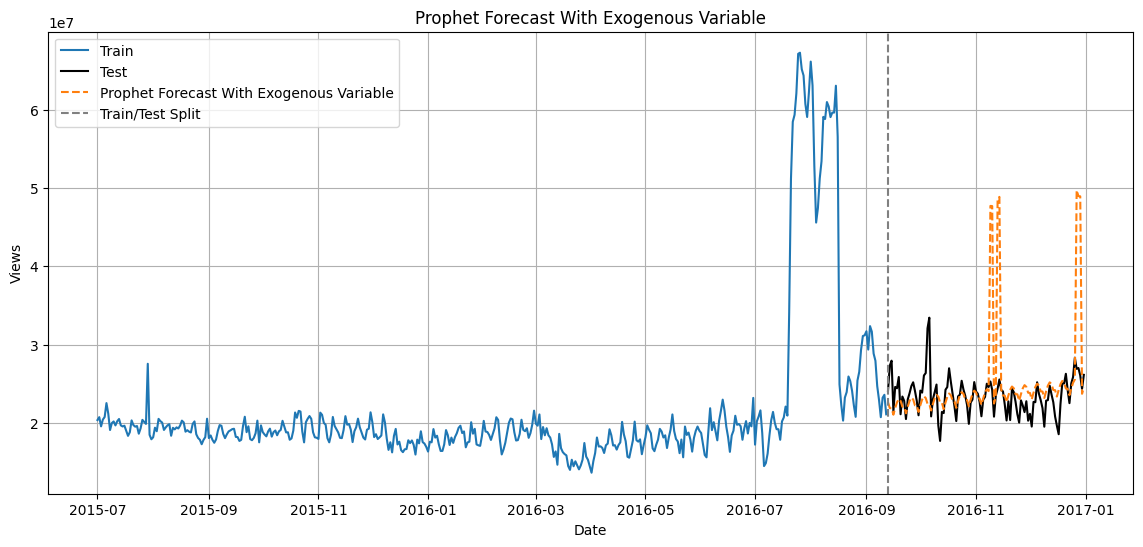

In [61]:
# Split exogenous data just like you did for the main series
exog_train = exog_df.iloc[:-test_size].reset_index()
exog_test = exog_df.iloc[-test_size:].reset_index()

# Prepare Prophet compatible dataframes
train_df = train.reset_index()
train_df.columns = ['ds', 'y']
train_df['campaign'] = exog_train['campaign'].values

test_df = test.reset_index()
test_df.columns = ['ds', 'y']
test_df['campaign'] = exog_test['campaign'].values

# Fit Prophet with regressor
model = Prophet()
model.add_regressor('campaign')
model.fit(train_df)

# Create future dataframe & forecast

# Combine train and test campaign values into one
future = pd.concat([train_df[['ds', 'campaign']], test_df[['ds', 'campaign']]]).reset_index(drop=True)
forecast = model.predict(future)

# Extract only the test period forecast
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test_df):]

# Evaluate
y_true = test_df['y'].values
y_pred = forecast_test['yhat'].values

print("\n📊 Prophet with Exogenous Variable")
print(f"MAE  = {mean_absolute_error(y_true, y_pred):.2f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
print(f"MAPE = {mean_absolute_percentage_error(y_true, y_pred) * 100:.2f}%")

# Plot
plt.figure(figsize=(14, 6))

plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Test', color='black')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Forecast With Exogenous Variable', linestyle='--')

plt.axvline(test_df['ds'].iloc[0], color='gray', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title("Prophet Forecast With Exogenous Variable")
plt.xlabel("Date")
plt.ylabel("Views")
plt.grid(True)
plt.show()


In [62]:
# Check if there too few campaign points in training set
exog_train['campaign'].sum()/len(exog_train)

np.float64(0.10681818181818181)

In [63]:
exog_df.value_counts(normalize=True)

,proportion
campaign,
0.0,0.901818
1.0,0.098182


In [64]:
print(f"Exog train count = {len(exog_train)}")
print(f"Exog train sum = {exog_train['campaign'].sum()}")

Exog train count = 440
Exog train sum = 47.0


In [65]:
# Check regressor weight in prophet

# Fit Prophet with regressor
model = Prophet()
model.add_regressor('campaign')
model.fit(train_df)

# Combine train and test campaign values into one
future = pd.concat([train_df[['ds', 'campaign']], test_df[['ds', 'campaign']]]).reset_index(drop=True)
forecast = model.predict(future)

# Extract only the test period forecast
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test_df):]

# Evaluate
y_true = test_df['y'].values
y_pred = forecast_test['yhat'].values

# Extract the coefficient of the 'campaign' regressor
campaign_effect = model.params['beta'][0]
print(f"\nEstimated campaign effect on y: \n{campaign_effect}")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/edf1yi_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/qeb5fz6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98033', 'data', 'file=/tmp/tmpglw3ycwk/edf1yi_6.json', 'init=/tmp/tmpglw3ycwk/qeb5fz6b.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_modelp6an99n2/prophet_model-20250611003524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:35:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:35:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Estimated campaign effect on y: 
[-0.00721405 -0.0095957  -0.00083647  0.00235654 -0.00045551  0.00349833
  0.362458  ]


In [66]:
print(train_df[['y', 'campaign']].describe())


                  y    campaign
count  4.400000e+02  440.000000
mean   2.154785e+07    0.106818
std    1.003368e+07    0.309234
min    1.365894e+07    0.000000
25%    1.785012e+07    0.000000
50%    1.893490e+07    0.000000
75%    2.023601e+07    0.000000
max    6.726426e+07    1.000000


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/k_5vmame.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/26sduuik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92025', 'data', 'file=/tmp/tmpglw3ycwk/k_5vmame.json', 'init=/tmp/tmpglw3ycwk/26sduuik.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_modelzii2g19e/prophet_model-20250611003524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:35:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:35:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

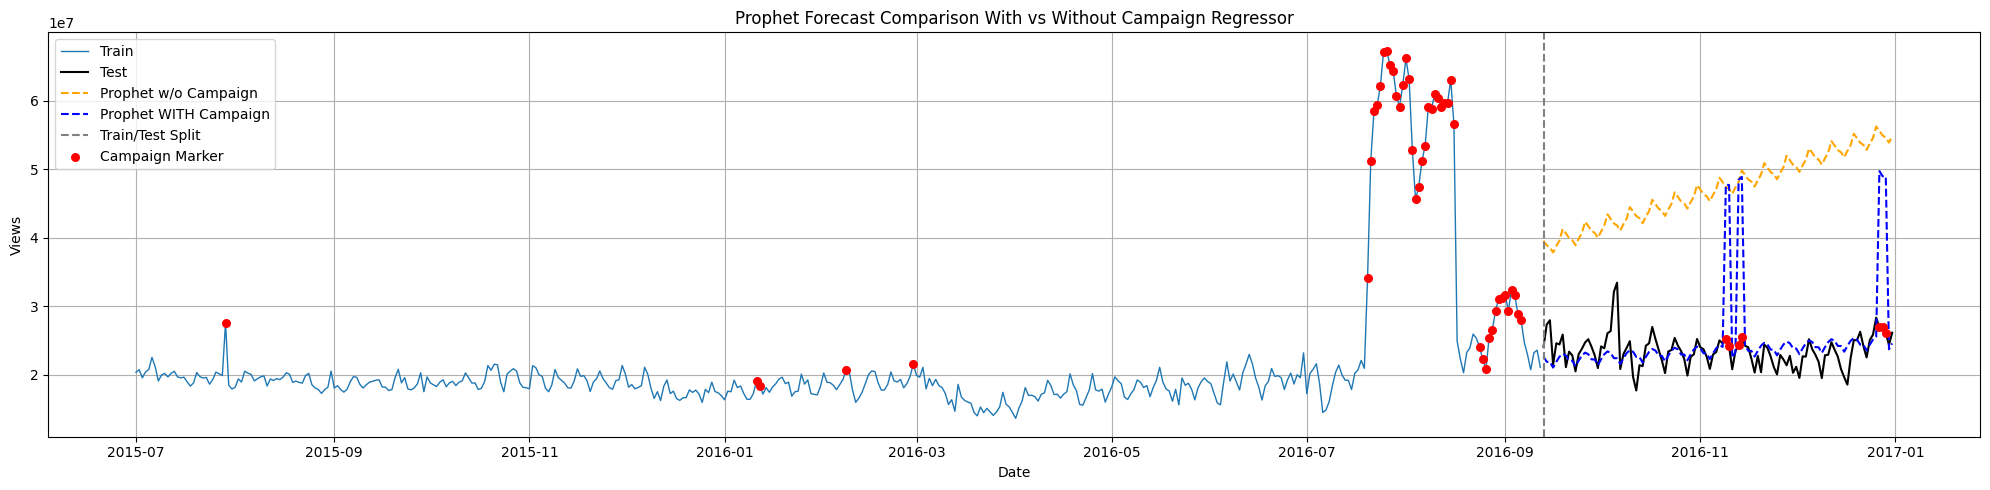

In [67]:
# Compare Prophet forecasting with & without forecasting

# Step 1: Prophet WITHOUT campaign
model_no_campaign = Prophet()
model_no_campaign.fit(train_df[['ds', 'y']])  # Only ds, y

# Future frame
future_no_campaign = pd.concat([train_df[['ds']], test_df[['ds']]], ignore_index=True)
forecast_no_campaign = model_no_campaign.predict(future_no_campaign)
forecast_test_no_campaign = forecast_no_campaign[['ds', 'yhat']].iloc[-len(test_df):]

# Step 2: Prophet WITH campaign
model_with_campaign = Prophet()
model_with_campaign.add_regressor('campaign')
model_with_campaign.fit(train_df)

# Future frame with campaign
future_with_campaign = pd.concat([train_df[['ds', 'campaign']], test_df[['ds', 'campaign']]], ignore_index=True)
forecast_with_campaign = model_with_campaign.predict(future_with_campaign)
forecast_test_with_campaign = forecast_with_campaign[['ds', 'yhat']].iloc[-len(test_df):]

plt.figure(figsize=(20, 5))

# Actual
plt.plot(train_df['ds'], train_df['y'], label='Train', linewidth=1)
plt.plot(test_df['ds'], test_df['y'], label='Test', color='black')

# Forecasts
plt.plot(forecast_test_no_campaign['ds'], forecast_test_no_campaign['yhat'],
         label='Prophet w/o Campaign', linestyle='--', color='orange')

plt.plot(forecast_test_with_campaign['ds'], forecast_test_with_campaign['yhat'],
         label='Prophet WITH Campaign', linestyle='--', color='blue')

# Train/test split line
plt.axvline(test_df['ds'].iloc[0], color='gray', linestyle='--', label='Train/Test Split')

plt.title("Prophet Forecast Comparison With vs Without Campaign Regressor")
plt.xlabel("Date")
plt.ylabel("Views")

plt.grid(True)
plt.tight_layout()

# Find campaign dates - Combine train and test
full_df = pd.concat([train_df, test_df], ignore_index=True)
campaign_values = full_df.loc[full_df['campaign'] == 1]
plt.scatter(campaign_values['ds'], campaign_values['y'],
            color='red', s=30, label='Campaign Marker', zorder=5)

plt.legend()
plt.show()



In [68]:
# Compare metrics - Prophet without campaign & with campaign
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Actual test values
y_true = test_df['y'].values

# Forecasts
y_pred_no_campaign = forecast_test_no_campaign['yhat'].values
y_pred_with_campaign = forecast_test_with_campaign['yhat'].values

# Errors without campaign
mae_no = mean_absolute_error(y_true, y_pred_no_campaign)
rmse_no = np.sqrt(mean_squared_error(y_true, y_pred_no_campaign))
mape_no = mean_absolute_percentage_error(y_true, y_pred_no_campaign) * 100

# Errors with campaign
mae_with = mean_absolute_error(y_true, y_pred_with_campaign)
rmse_with = np.sqrt(mean_squared_error(y_true, y_pred_with_campaign))
mape_with = mean_absolute_percentage_error(y_true, y_pred_with_campaign) * 100

# Print results
print("📊 Forecast Error Comparison\n")

print("Without Campaign:")
print(f"  MAE:  {mae_no:,.0f}")
print(f"  RMSE: {rmse_no:,.0f}")
print(f"  MAPE: {mape_no:.2f}%\n")

print("With Campaign:")
print(f"  MAE:  {mae_with:,.0f}")
print(f"  RMSE: {rmse_with:,.0f}")
print(f"  MAPE: {mape_with:.2f}%")


📊 Forecast Error Comparison

Without Campaign:
  MAE:  23,554,353
  RMSE: 24,178,610
  MAPE: 102.24%

With Campaign:
  MAE:  3,086,641
  RMSE: 6,271,750
  MAPE: 12.67%


In [69]:
# Apply log transformation to smoothen out the sharp spikes in data
import numpy as np
from prophet import Prophet

# Step 1: Log-transform the target variable
train_df['y'] = np.log1p(train_df['y'])   # log(1 + y) to avoid log(0)
test_df['y'] = np.log1p(test_df['y'])     # apply the same to test for later comparison

# Step 2: Build Prophet model with campaign regressor
model_with_campaign = Prophet()
model_with_campaign.add_regressor('campaign')

# Step 3: Fit the model
model_with_campaign.fit(train_df)

# Step 4: Create full future frame (train + test period)
future_with_campaign = pd.concat(
    [train_df[['ds', 'campaign']], test_df[['ds', 'campaign']]],
    ignore_index=True
)

# Step 5: Predict
forecast_with_campaign = model_with_campaign.predict(future_with_campaign)

# Step 6: Inverse the log1p transform
y_test_actual = np.expm1(test_df['y'])
forecast_with_campaign['yhat'] = np.expm1(forecast_with_campaign['yhat'])  # exp(yhat) - 1

# Optional: if you're using intervals
forecast_with_campaign['yhat_lower'] = np.expm1(forecast_with_campaign['yhat_lower'])
forecast_with_campaign['yhat_upper'] = np.expm1(forecast_with_campaign['yhat_upper'])

# Step 7: Extract test-period forecast
forecast_test_with_campaign = forecast_with_campaign[['ds', 'yhat']].iloc[-len(test_df):]

mae = mean_absolute_error(y_test_actual, forecast_test_with_campaign['yhat'])
rmse =  np.sqrt(mean_squared_error(y_true, forecast_test_with_campaign['yhat']))
mape = mean_absolute_percentage_error(y_test_actual, forecast_test_with_campaign['yhat']) * 100

print(f"MAE  = {mae:,.0f}")
print(f"RMSE = {rmse:,.0f}")
print(f"MAPE = {mape:.2f}%")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/u49pud0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/li1kjinz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33726', 'data', 'file=/tmp/tmpglw3ycwk/u49pud0i.json', 'init=/tmp/tmpglw3ycwk/li1kjinz.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_modelkchofm0y/prophet_model-20250611003524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:35:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:35:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE  = 2,855,371
RMSE = 5,748,359
MAPE = 11.54%


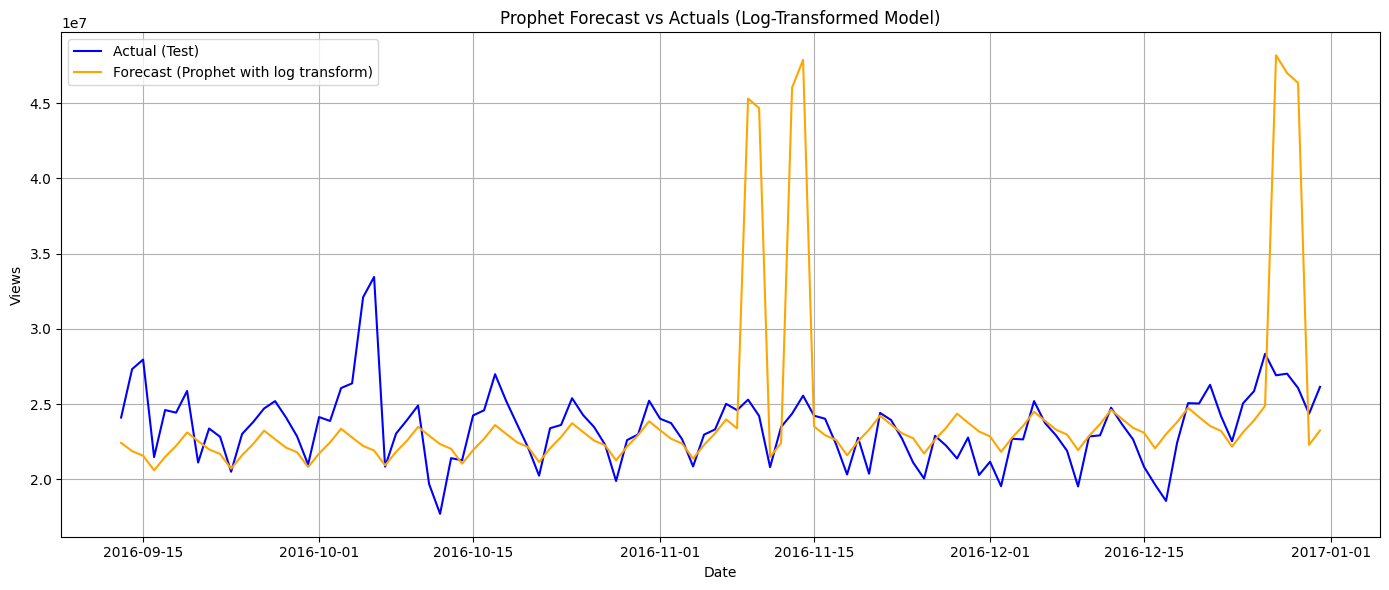

In [70]:
# Plot Prophet forecasting with campaign data & using log transformation

# Step 1: Inverse transform actuals and predictions
y_true = np.expm1(test_df['y'])
y_pred = forecast_test_with_campaign['yhat']
dates = forecast_test_with_campaign['ds']

# Step 2: Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(dates, y_true, label='Actual (Test)', color='blue')
plt.plot(dates, y_pred, label='Forecast (Prophet with log transform)', color='orange')

# Optional: Add uncertainty intervals
if 'yhat_lower' in forecast_test_with_campaign.columns:
    yhat_lower = np.expm1(forecast_with_campaign['yhat_lower'].iloc[-len(test_df):])
    yhat_upper = np.expm1(forecast_with_campaign['yhat_upper'].iloc[-len(test_df):])
    plt.fill_between(dates, yhat_lower, yhat_upper, color='orange', alpha=0.2, label='Confidence Interval')

# Styling
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Prophet Forecast vs Actuals (Log-Transformed Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
# Forecast using SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split exogenous data just like you did for the main series
# Keep the index for alignment with the time series data
exog_train = exog_df.iloc[:-test_size]
exog_test = exog_df.iloc[-test_size:]

# (p,d,q)(P,D,Q,s) — try this basic seasonal config first
model = SARIMAX(train,
                order=(2, 0, 1),               # ARIMA component
                seasonal_order=(1, 1, 1, 7),   # weekly seasonality
                exog=exog_train[['campaign']],
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit(disp=False)

print("\nSARIMAX model fitted successfully.")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



SARIMAX model fitted successfully.


📊 SARIMAX Forecast
MAE  = 3992089.84
RMSE = 5748358.75
MAPE = 16.37%


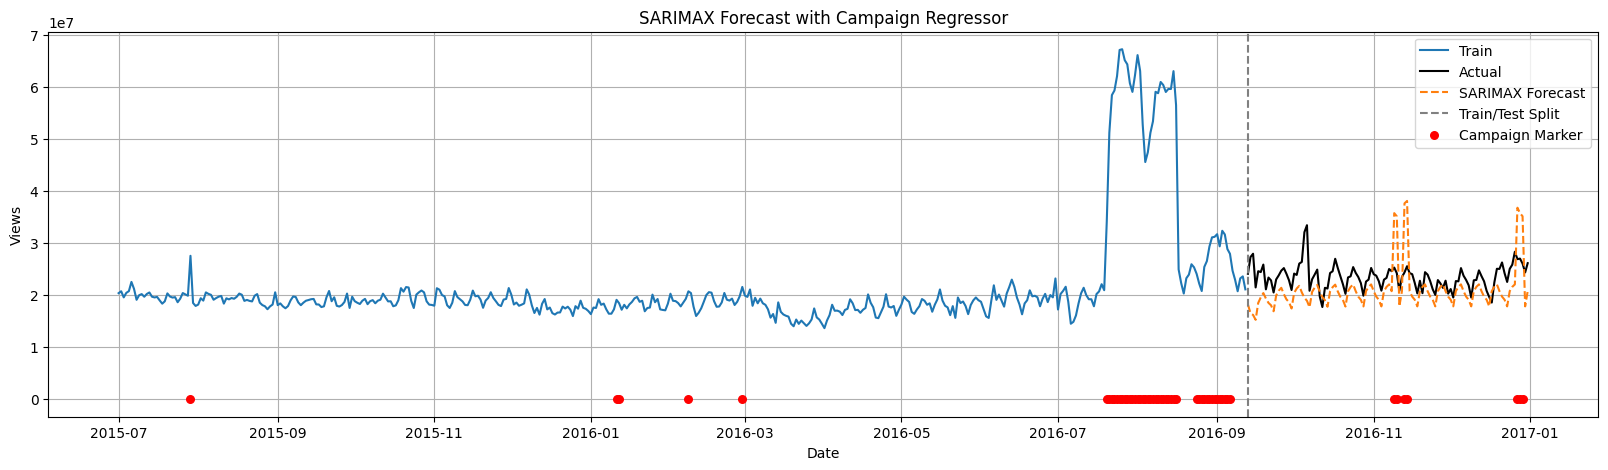

In [72]:
forecast = result.predict(start=len(train),
                          end=len(train)+len(test)-1,
                          exog=exog_test)

print("📊 SARIMAX Forecast")
print(f"MAE  = {mean_absolute_error(test, forecast):.2f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
print(f"MAPE = {mean_absolute_percentage_error(test, forecast) * 100:.2f}%")

# Plot
plt.figure(figsize=(20, 5))

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual', color='black')
plt.plot(test.index, forecast, label='SARIMAX Forecast', linestyle='--')

plt.axvline(test.index[0], color='gray', linestyle='--', label='Train/Test Split')

plt.title("SARIMAX Forecast with Campaign Regressor")
plt.xlabel("Date")
plt.ylabel("Views")
plt.grid(True)

# Find campaign dates - Combine train and test
full_df = pd.concat([train_df, test_df], ignore_index=True)
campaign_values = full_df.loc[full_df['campaign'] == 1]
plt.scatter(campaign_values['ds'], campaign_values['y'],
            color='red', s=30, label='Campaign Marker', zorder=5)

plt.legend()
plt.show()

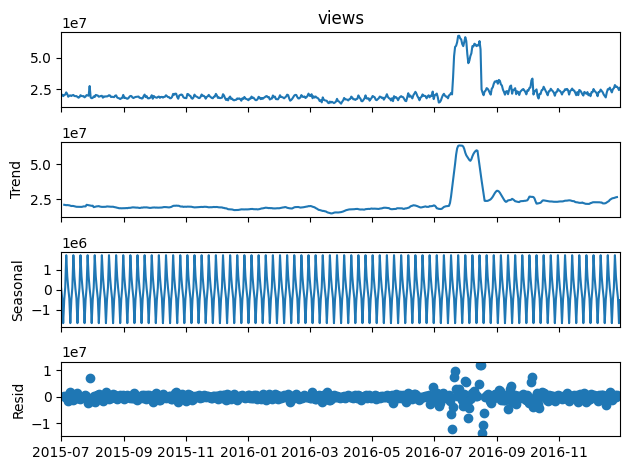

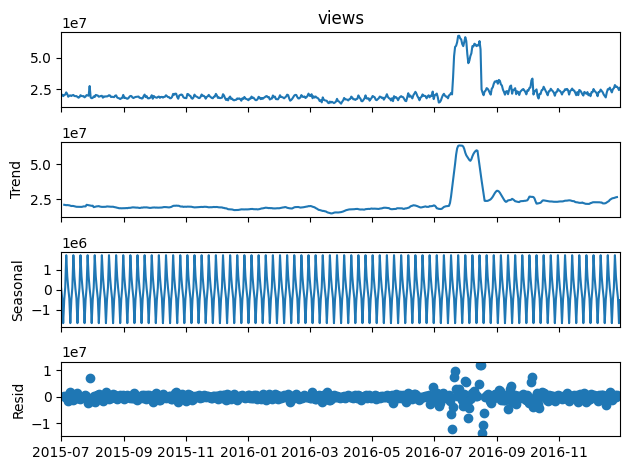

In [73]:
# Tuning Seasonal Order (P, D, Q, s)
# s = 7 (weekly seasonality)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(series, model='additive', period=7)
decomposition.plot()



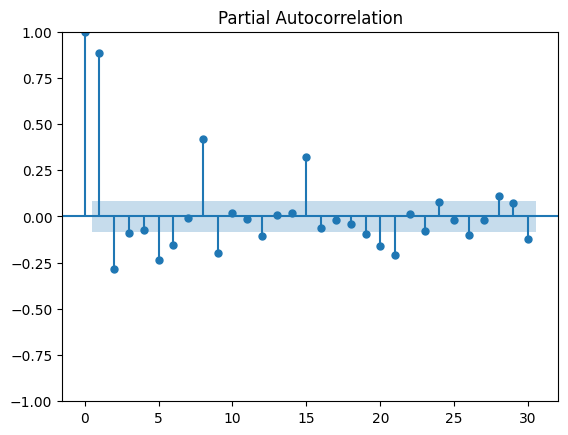

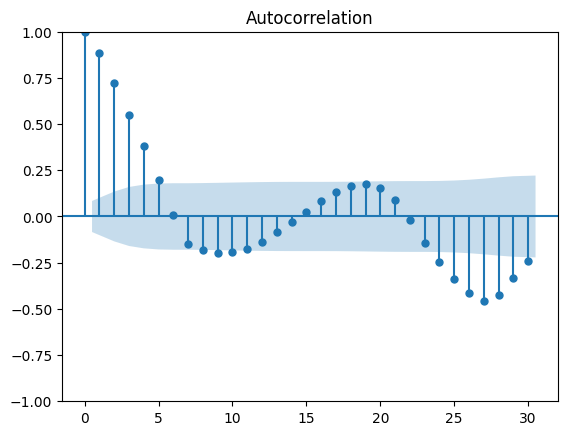

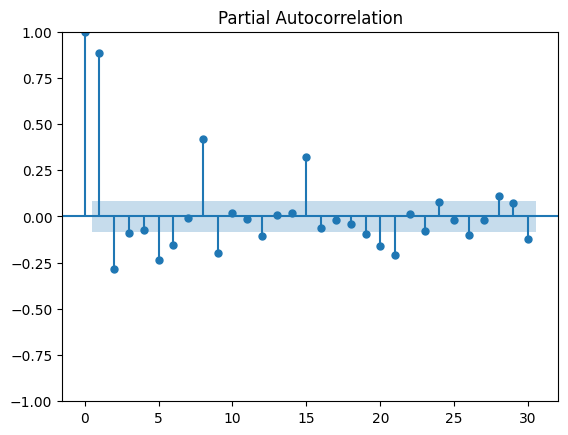

In [74]:
seasonal_diff = series.diff(7).dropna()
plot_acf(seasonal_diff, lags=30)
plot_pacf(seasonal_diff, lags=30)

In [75]:
# Forecasting for different languages/regions
df_melt.head()

,name,language,access_type,access_origin,date,views
0,2NE1,zh,all-access,spider,2015-07-01,18.0
1,2PM,zh,all-access,spider,2015-07-01,11.0
2,3C,zh,all-access,spider,2015-07-01,1.0
3,4minute,zh,all-access,spider,2015-07-01,35.0
4,52_Hz_I_Love_You,zh,all-access,spider,2015-07-01,NaN


In [76]:
df_melt['language'].value_counts()

,count
language,
en,13259400
ja,11237050
de,10200850
fr,9791100
zh,9475950
ru,8262100
es,7737950


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/umv4956t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/458lylcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38197', 'data', 'file=/tmp/tmpglw3ycwk/umv4956t.json', 'init=/tmp/tmpglw3ycwk/458lylcr.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_model7e10uexx/prophet_model-20250611004023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test size = 110

📊 Prophet Evaluation: Prophet Forecast - Language: en
MAE  = 1728290.30
RMSE = 2004098.76
MAPE = 11.05%


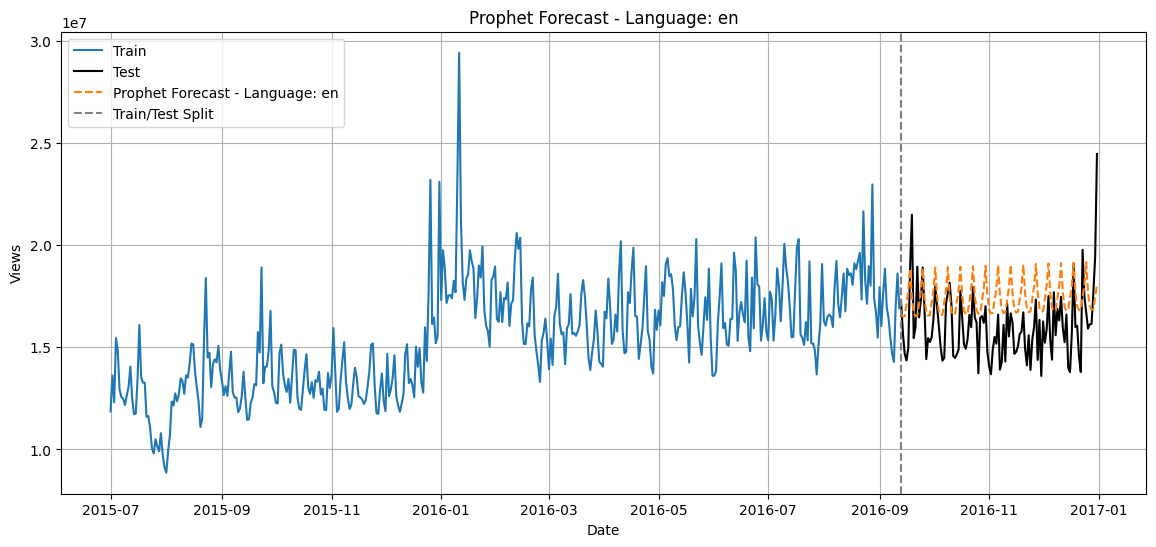

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/7gk5luyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/ujveyr4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21240', 'data', 'file=/tmp/tmpglw3ycwk/7gk5luyq.json', 'init=/tmp/tmpglw3ycwk/ujveyr4h.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_modeljav1xdf1/prophet_model-20250611004024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test size = 110

📊 Prophet Evaluation: Prophet Forecast - Language: ja
MAE  = 1728290.30
RMSE = 2004098.76
MAPE = 11.05%


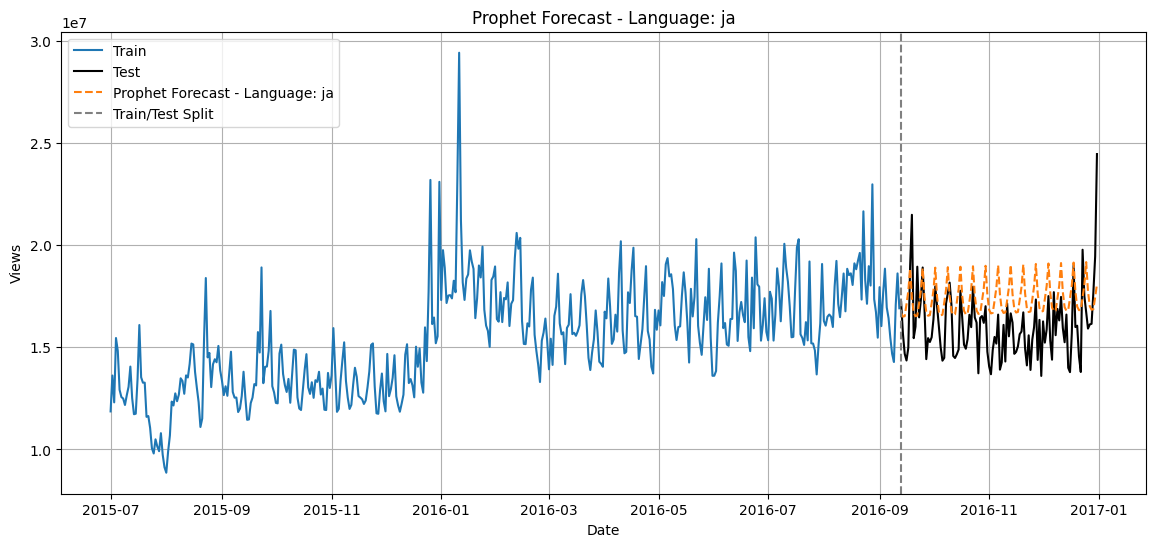

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/5vd_db6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/0adcsflr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57259', 'data', 'file=/tmp/tmpglw3ycwk/5vd_db6w.json', 'init=/tmp/tmpglw3ycwk/0adcsflr.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_modelsvo339_l/prophet_model-20250611004025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test size = 110

📊 Prophet Evaluation: Prophet Forecast - Language: de
MAE  = 3212108.94
RMSE = 3719666.93
MAPE = 18.77%


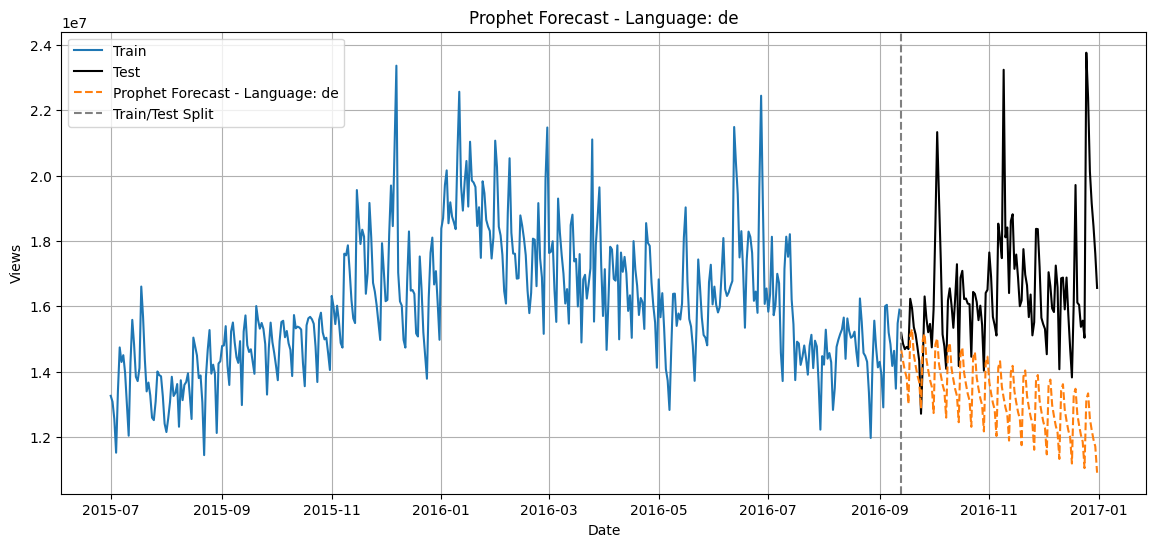

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/_g2xd1_e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/ttt8w6vo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46256', 'data', 'file=/tmp/tmpglw3ycwk/_g2xd1_e.json', 'init=/tmp/tmpglw3ycwk/ttt8w6vo.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_modelnusrw8eo/prophet_model-20250611004026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test size = 110

📊 Prophet Evaluation: Prophet Forecast - Language: fr
MAE  = 2398444.78
RMSE = 2754704.26
MAPE = 18.44%


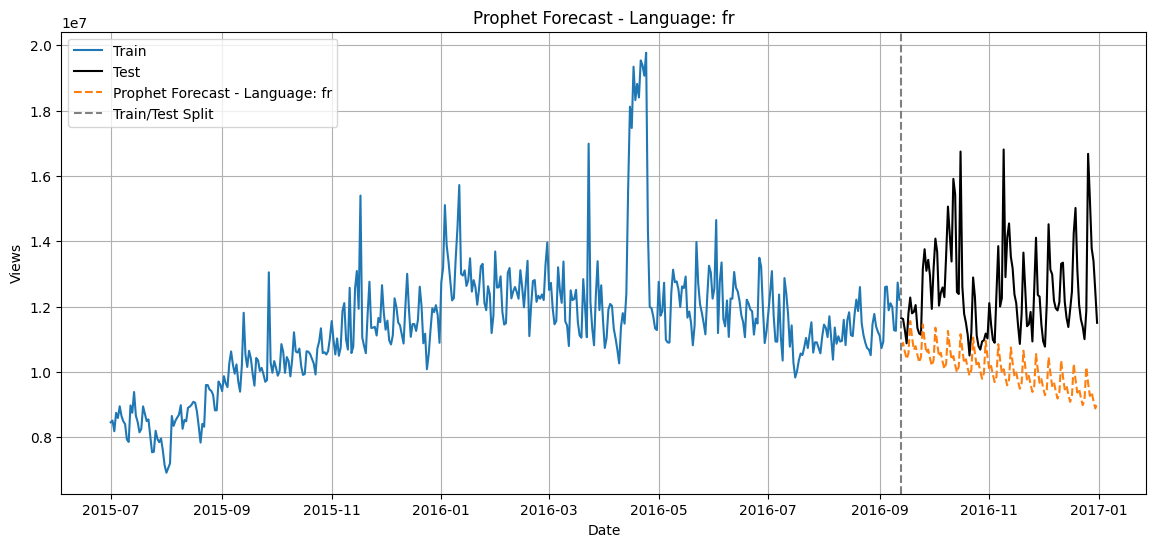

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/cxrce766.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/wpengjp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2917', 'data', 'file=/tmp/tmpglw3ycwk/cxrce766.json', 'init=/tmp/tmpglw3ycwk/wpengjp7.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_model3oaj78xj/prophet_model-20250611004027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test size = 110

📊 Prophet Evaluation: Prophet Forecast - Language: zh
MAE  = 427292.60
RMSE = 534102.13
MAPE = 6.63%


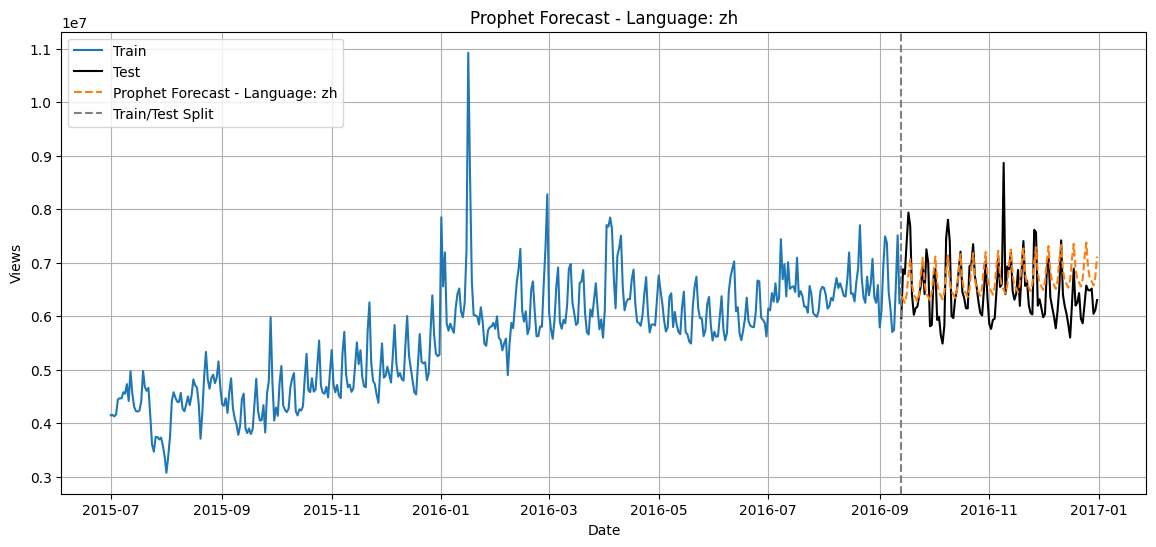

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/zhpom2iw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/ft0644ae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19206', 'data', 'file=/tmp/tmpglw3ycwk/zhpom2iw.json', 'init=/tmp/tmpglw3ycwk/ft0644ae.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_model8mpciiy7/prophet_model-20250611004028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test size = 110

📊 Prophet Evaluation: Prophet Forecast - Language: ru
MAE  = 7049040.52
RMSE = 7190302.07
MAPE = 50.69%


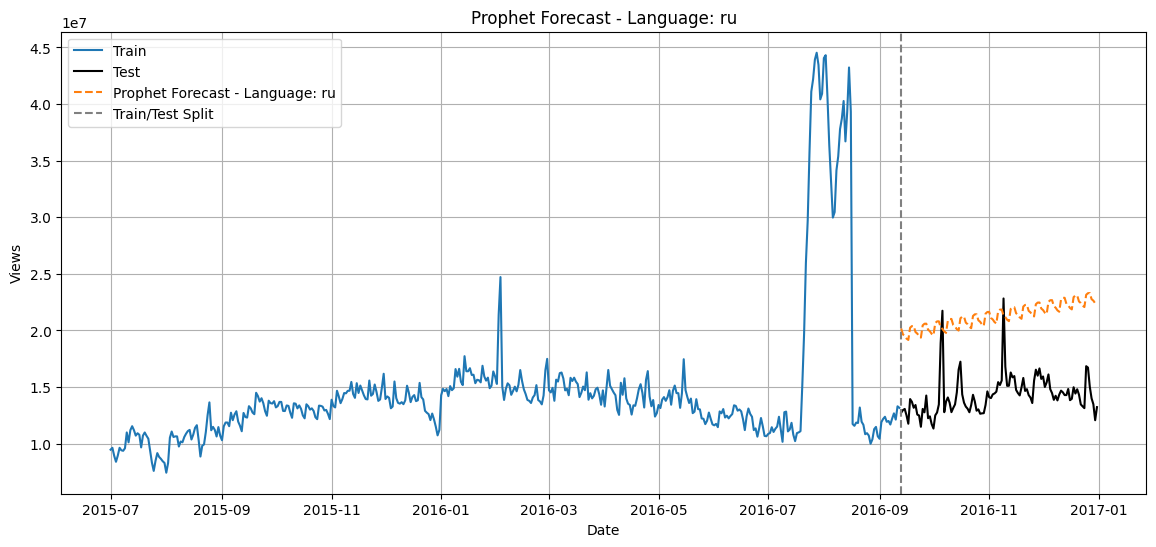

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/zj8nj01h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/epdo_zxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72085', 'data', 'file=/tmp/tmpglw3ycwk/zj8nj01h.json', 'init=/tmp/tmpglw3ycwk/epdo_zxj.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_modell8v7k5xq/prophet_model-20250611004028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test size = 110

📊 Prophet Evaluation: Prophet Forecast - Language: es
MAE  = 1973045.62
RMSE = 2441586.99
MAPE = 10.79%


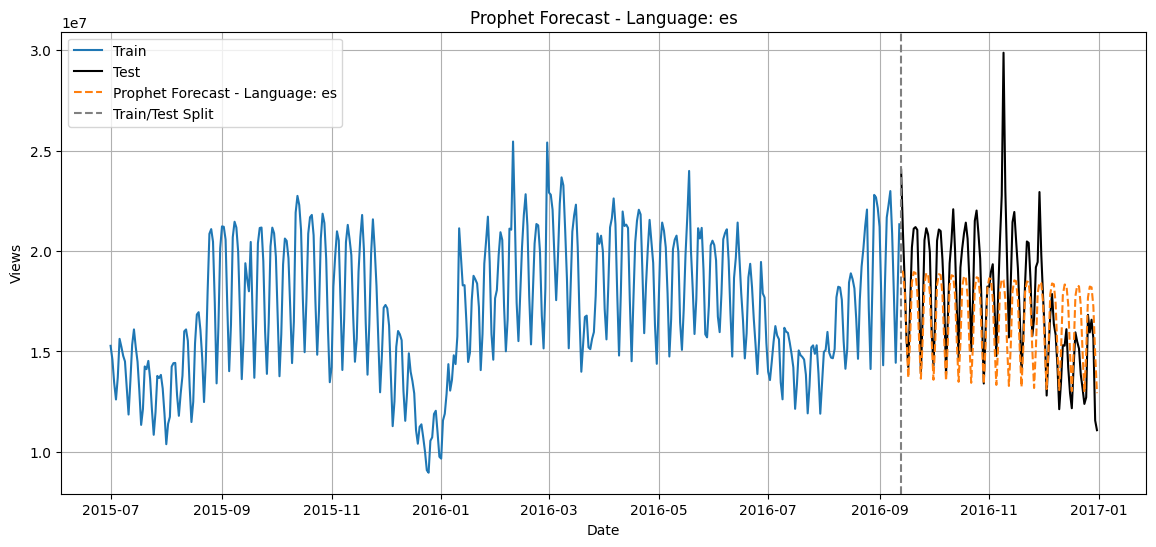

In [80]:
# Forecast with FB prophet (without campaign data)
# NOTE: campaign data was given only for en language

# Creating a pipeline for working with multiple series
# Preprocessing -> Train/test split -> Modeling (Prophet) -> Forecasting -> Evaluation (MAE, RMSE, MAPE) -> Visualizations

from prophet import Prophet

def apply_eval_prophet(df_lang, lang, test_size):
  segment_df = df_lang.groupby('date')['views'].sum()

  # Convert the index to datetime format
  segment_df.index = pd.to_datetime(segment_df.index)

  # Extract the time series
  series = segment_df

  # Taking 20% of data as test size
  test_size = int(0.2 * len(series))
  print(f'Test size = {test_size}\n')

  # Split into train, test sets
  train = series[:-test_size]
  test = series[-test_size:]

  # Convert train and test into DataFrames with 'ds' and 'y'
  train_df = train.reset_index()
  train_df.columns = ['ds', 'y']

  test_df = test.reset_index()
  test_df.columns = ['ds', 'y']

  '''
  # Log-transform the target variable
  train_df['y'] = np.log1p(train_df['y'])   # log(1 + y) to avoid log(0)
  test_df['y'] = np.log1p(test_df['y'])     # apply the same to test for later comparison
  '''

  # Initialize and train Prophet - without exogenous variable
  model = Prophet()
  model.fit(train_df)

  # Create future dataframe
  future = model.make_future_dataframe(periods=len(test_df))

  # Forecast
  forecast = model.predict(future)

  # Get only the forecasted test period
  forecast_test = forecast[['ds', 'yhat']].iloc[-len(test_df):]

  '''
  # Inverse transform & Evaluate
  y_true = np.expm1(test_df['y'].values)
  y_pred = np.expm1(forecast_test['yhat'].values)
  '''

  # Evaluate
  y_true = test_df['y'].values
  y_pred = forecast_test['yhat'].values

  title = f"Prophet Forecast - Language: {lang}"

  print(f"📊 Prophet Evaluation: {title}")
  print(f"MAE  = {mean_absolute_error(y_true, y_pred):.2f}")
  print(f"RMSE = {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
  print(f"MAPE = {mean_absolute_percentage_error(y_true, y_pred)*100:.2f}%")

  # Plot
  plt.figure(figsize=(14, 6))

  plt.plot(train_df['ds'], train_df['y'], label='Train')
  plt.plot(test_df['ds'], test_df['y'], label='Test', color='black')
  plt.plot(forecast_test['ds'], forecast_test['yhat'], label=title, linestyle='--')

  plt.axvline(test_df['ds'].iloc[0], color='gray', linestyle='--', label='Train/Test Split')
  plt.legend()
  plt.title(title)
  plt.xlabel("Date")
  plt.ylabel("Views")
  plt.grid(True)
  plt.show()

# Call the function on all languages
df_en = df_melt[df_melt['language'] == 'en']
df_ja = df_melt[df_melt['language'] == 'ja']
df_de = df_melt[df_melt['language'] == 'de']
df_fr = df_melt[df_melt['language'] == 'fr']
df_zh = df_melt[df_melt['language'] == 'zh']
df_ru = df_melt[df_melt['language'] == 'ru']
df_es = df_melt[df_melt['language'] == 'es']

apply_eval_prophet(df_ja, 'en', test_size)
apply_eval_prophet(df_ja, 'ja', test_size)
apply_eval_prophet(df_de, 'de', test_size)
apply_eval_prophet(df_fr, 'fr', test_size)
apply_eval_prophet(df_zh, 'zh', test_size)
apply_eval_prophet(df_ru, 'ru', test_size)
apply_eval_prophet(df_es, 'es', test_size)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/twkzh3ph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpglw3ycwk/b49rv1hy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83937', 'data', 'file=/tmp/tmpglw3ycwk/twkzh3ph.json', 'init=/tmp/tmpglw3ycwk/b49rv1hy.json', 'output', 'file=/tmp/tmpglw3ycwk/prophet_modeljdueuhtu/prophet_model-20250611010023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:00:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:00:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test size = 110


📊 Prophet with Exogenous Variable
MAE  = 8415389.10
RMSE = 10714472.70
MAPE = 6.72%


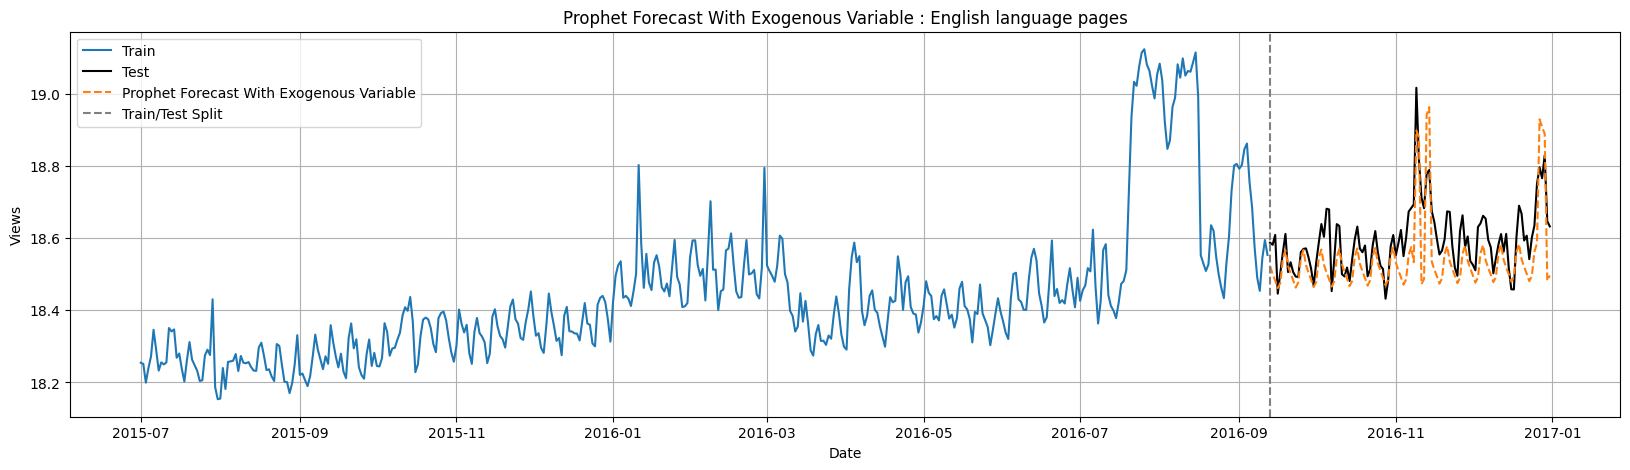

In [94]:
# Run facebook prophet on df_en with exogenous campaign data (regressor)

segment_df = df_en.groupby('date')['views'].sum()
segment_df.index = pd.to_datetime(segment_df.index)
series = segment_df

# Taking 20% of data as test size
test_size = int(0.2 * len(series))
print(f'Test size = {test_size}\n')

# Split into train, test sets
train = series[:-test_size]
test = series[-test_size:]

# Forecasting with Prophet (with exogenous variable)
exog_df = pd.read_csv('/content/sample_data/Exog_Campaign_eng.csv')

# Assign time index from your series to the exogenous variable
exog_df.index = series.index

exog_df.columns = ['campaign']  # Rename for clarity
exog_df['campaign'] = exog_df['campaign'].astype(float)

# Split exogenous data just like you did for the main series
exog_train = exog_df.iloc[:-test_size].reset_index()
exog_test = exog_df.iloc[-test_size:].reset_index()

# Prepare Prophet compatible dataframes
train_df = train.reset_index()
train_df.columns = ['ds', 'y']
train_df['campaign'] = exog_train['campaign'].values

test_df = test.reset_index()
test_df.columns = ['ds', 'y']
test_df['campaign'] = exog_test['campaign'].values

# Log-transform the target variable
train_df['y'] = np.log1p(train_df['y'])   # log(1 + y) to avoid log(0)
test_df['y'] = np.log1p(test_df['y'])     # apply the same to test for later comparison

# Fit Prophet with regressor
model = Prophet()
model.add_regressor('campaign')
model.fit(train_df)

# Combine train and test campaign values into one
future = pd.concat([train_df[['ds', 'campaign']], test_df[['ds', 'campaign']]]).reset_index(drop=True)
forecast = model.predict(future)

# Extract only the test period forecast
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test_df):]

# Inverse transform & Evaluate
y_true = np.expm1(test_df['y'].values)
y_pred = np.expm1(forecast_test['yhat'].values)

'''
# Evaluate
y_true = test_df['y'].values
y_pred = forecast_test['yhat'].values
'''

print("\n📊 Prophet with Exogenous Variable")
print(f"MAE  = {mean_absolute_error(y_true, y_pred):.2f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
print(f"MAPE = {mean_absolute_percentage_error(y_true, y_pred) * 100:.2f}%")

# Plot
plt.figure(figsize=(20, 5))

plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Test', color='black')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Forecast With Exogenous Variable', linestyle='--')

plt.axvline(test_df['ds'].iloc[0], color='gray', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title("Prophet Forecast With Exogenous Variable : English language pages")
plt.xlabel("Date")
plt.ylabel("Views")
plt.grid(True)
plt.show()


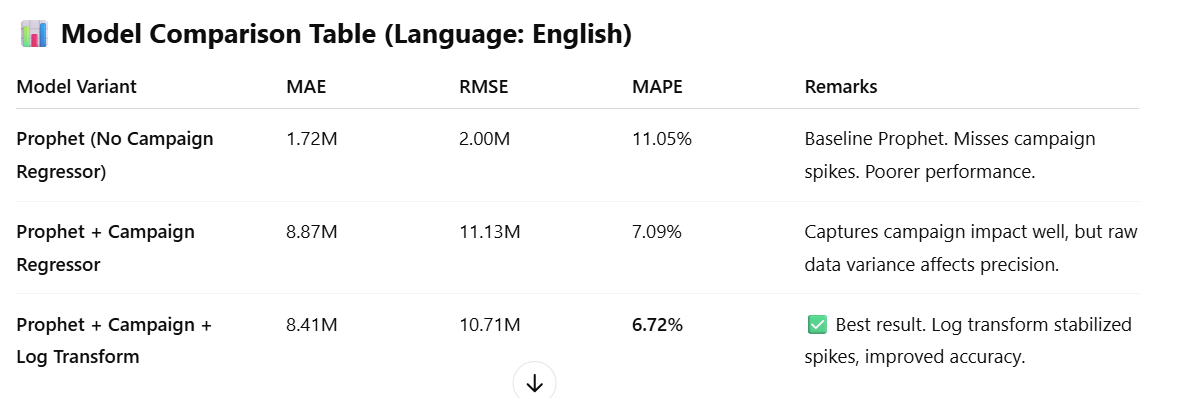

En views = 101,439,014.0
Ja views = 15,539,027.0
De views = 15,878,655.5
Fr views = 11,525,041.5
Zh views = 5,927,901.5
Ru views = 13,585,579.0
Es views = 17,100,964.0


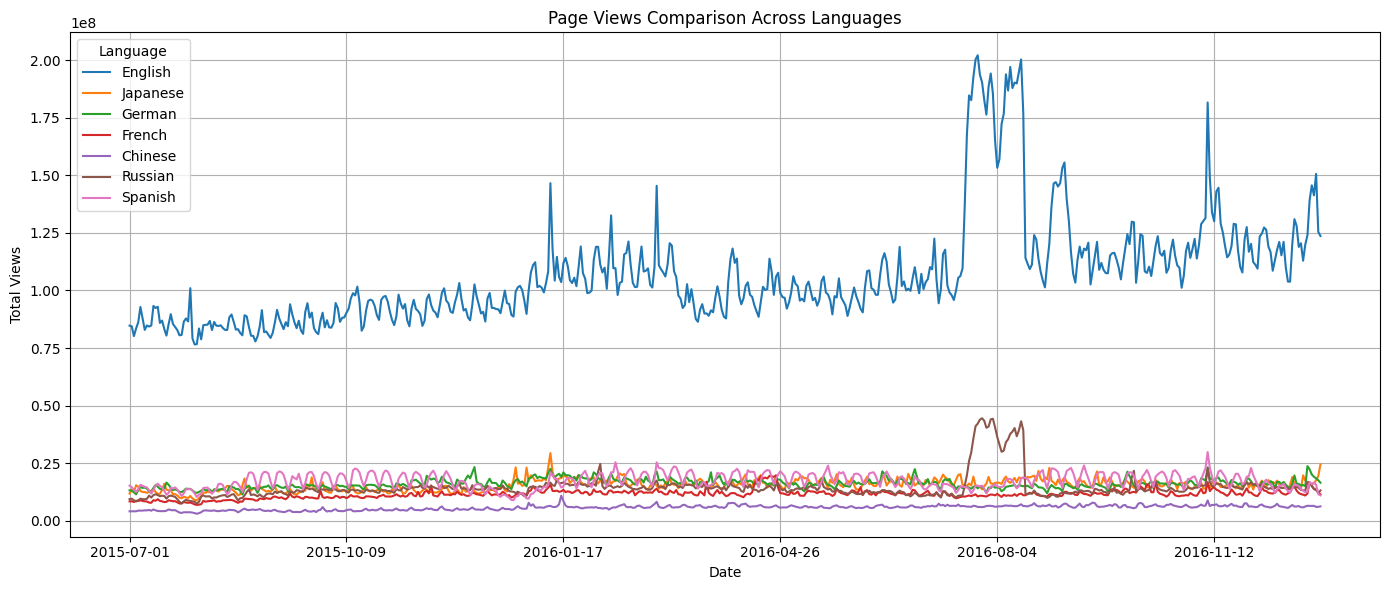

In [99]:
# Compare views across different languages

series_en = df_en.groupby('date')['views'].sum()
series_ja = df_ja.groupby('date')['views'].sum()
series_de = df_de.groupby('date')['views'].sum()
series_fr = df_fr.groupby('date')['views'].sum()
series_zh = df_zh.groupby('date')['views'].sum()
series_ru = df_ru.groupby('date')['views'].sum()
series_es = df_es.groupby('date')['views'].sum()

print(f'En views = {series_en.median():,}')
print(f'Ja views = {series_ja.median():,}')
print(f'De views = {series_de.median():,}')
print(f'Fr views = {series_fr.median():,}')
print(f'Zh views = {series_zh.median():,}')
print(f'Ru views = {series_ru.median():,}')
print(f'Es views = {series_es.median():,}')

# Create a DataFrame combining all the series
df_compare = pd.DataFrame({
    'English': series_en,
    'Japanese': series_ja,
    'German': series_de,
    'French': series_fr,
    'Chinese': series_zh,
    'Russian': series_ru,
    'Spanish': series_es
})

# Plot
plt.figure(figsize=(14, 6))
df_compare.plot(ax=plt.gca())  # Plot all series on same axes
plt.title('Page Views Comparison Across Languages')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.legend(title='Language')
plt.grid(True)
plt.tight_layout()
plt.show()


**Key Takeaways**:

*  Without campaign input, got a **MAPE of 11%** - Prophet underestimated the spikes
*  With campaign data added as exogenous regressor, **MAPE drops to 7%**
*  Applying log transformation to stabilize variance and smooth out the effect of spikes, **MAPE further drops to 6.7%**

**Questionnaire:**

*   Defining the problem statements and where can this and modifications of this be used?

The problem statement was to forecast traffic (pageviews) on webpages based on past timeseries data. This helps the Adease team & its partners to efficiently spend ad budgets by placing their ads on these pages based on traffic of its target audience.

Timeseries forecasting is a common requirement in other fields like - Stock market, inventory & sales prediction on e-commerce platforms like amazon, land

*   Write 3 inferences you made from the data visualizations

Showed a steady increase in traffic over time with occasional spikes due to campaigns & a strong seasonality at weekly level.

*   What does the decomposition of series do?

Decomposition breaks down the timeseries into 3 components for easier analysis & identification - trend, seasonality, residuals (random noise). There are 2 types - additive & multiplicative.

In additive, your timeseries = trend + seasonality + residuals, in multiplicative decomposition - your timeseries = trend * seasonality * residuals. In our case study, the given timeseries fits into additive decomposition.

*  What level of differencing gave you a stationary series?

Differencing is subtracting previous value from current value to remove trend from a timeseries data. In our data, we used ADF test for stationarity check. Without differencing (d=0), with a p-value < 0.05 the ADF test pointed to a stationary data without any differencing. But I went onto to try 1st order differencing (d=1) & got an even lesser p-value in ADF test.

*  Difference between arima, sarima & sarimax.

arima, sarima & sarimax timeseries forecasting models use:

AR - Auto regression (p) - uses past values
I - Differencing (d) - uses differencing (removes trend)
MA - Moving average (q) - uses past forecast errors

Seasonal ARIMA (SARIMA) - also additionally uses seasonal components - Seasonal AR (P), Seasonal Differencing (D), Seasonal MA (Q) with a seasonal period (s). SARIMA is useful when the series shows repeating seasonal patterns.

SARIMAX - extends SARIMA to account for effects of outside events (eg: campaigns, holidays). Ideal for modeling sudden spikes or drops not explained by past values alone.

*   Compare the number of views in different languages

Median daily total page views (across all pages) in English are ~100 million views while in other 6 languages median daily total page views ranged between total 6 to 15 million views.

*   What other methods other than grid search would be suitable to get the model for all languages?

To get the model for all languages, other methods are:
*  Bayesian optimization (optuna) - for ARIMA, SARIMA & SARIMAX
*  Auto-ARIMA (step wise search of model parameters)
*  Prophet with global parameters tuned for one language & reused for other languages
